# *Entregable 1 Deep Learning*
- Rubén Gil Martínez

# **P1.1**

**E1:** Crear un modelo de clasificación binaria para predecir si la suma de dos números es mayor a 1 usando un conjunto de datos sintético.

   - Se generan 1000 muestras con dos características cada una (`x_data`).
   - La etiqueta (`y_data`) es `1` si la suma de las dos características es mayor que 1, y `0` en caso contrario.
      - Ejemplo:
         - Entrada: `[0.6, 0.7]` → Suma: `1.3` → Etiqueta: `1`.
         - Entrada: `[0.3, 0.2]` → Suma: `0.5` → Etiqueta: `0`.

   - Se divide el conjunto en entrenamiento (80%) y prueba (20%).

   - Construir una red neuronal con dos capas:
     - Capa oculta: 64 neuronas y función de activación `relu`.
     - Capa de salida: 1 neurona con activación `sigmoid` para obtener una probabilidad entre 0 y 1 (para clasificación binaria).

   - Optimizador: `adam`, que ajusta los pesos durante el entrenamiento.
   - Pérdida: `binary_crossentropy`, que es adecuada para problemas de clasificación binaria.
   - Métrica: `accuracy`, que mide el porcentaje de predicciones correctas.

   - Se entrena en el conjunto de entrenamiento durante 30 épocas con un tamaño de lote de 32.
   - Utiliza el 20% de los datos de entrenamiento como conjunto de validación para monitorear el rendimiento.

   - El modelo se evalúa en el conjunto de prueba, calculando la pérdida y la precisión.

   - Se realizan predicciones en nuevas muestras (`x_sample`).
   - La salida del modelo son probabilidades (valores entre 0 y 1), y se convierten en clases (`0` o `1`) comparando con un umbral de 0.5.
      - Ejemplo:
         - Entrada: `[0.6, 0.6]` → Probabilidad: `0.95` → Clase: `1`.

**E2:** Cambiar el tamaño de la red (número de neuronas o capas) y analizar el impacto.

**E3:** Probar diferentes funciones de activación y analizar el impacto.



**E4:** Crear un modelo de regresión para predecir la suma de dos números usando un conjunto de datos sintético..

   - Se generan números aleatorios para las entradas ``x_1`` y ``x_2``, separándolo un 30% de ellos para test.
   - Las etiquetas ``y`` son la suma de ``x_1 + x_2``.

   - Una red neuronal simple con:
     - Una capa oculta de 64 neuronas con activación ReLU.
     - Una capa de salida con 1 neurona (regresión).

   - Optimización con Adam.
   - Pérdida: `mse` (error cuadrático medio), adecuada para problemas de regresión.
   - Métrica: `mae` (error absoluto medio), que mide la desviación promedio.

   - Se entrena el modelo durante 20 épocas con un tamaño de lote de 32.
   - El 20% de los datos se reserva para validación en el entrenamiento.

   - El modelo se evalúa en el conjunto de test no visto durante el entrenamiento.

   - Se realiza inferencia con nuevas muestras para verificar el rendimiento del modelo, por ejemplo para una entrada como `[0.3, 0.7]`, la salida debería estar cerca de `1.0`.

**E5:** Cambiar el tamaño del conjunto de datos y analizar el impacto.

**E6:** Aumentar la complejidad del problema (por ejemplo, usando ruido en las etiquetas).

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Fijar la semilla para reproducibilidad
np.random.seed(42)

# Generación de datos sintéticos
x_data = np.random.rand(1000, 2)  
y_data = (x_data.sum(axis=1) > 1).astype(int)


# Dividir en conjuntos de entrenamiento y prueba (80/20) con estratificación
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Construir la arquitectura del modelo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),
    layers.Dense(1, activation='sigmoid')
])

# Preparar el modelo para el entrenamiento: Algoritmo de optimización, función de pérdida y métrica de evaluación
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30


c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4193 - loss: 0.7106 - val_accuracy: 0.5188 - val_loss: 0.6952
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5912 - loss: 0.6781 - val_accuracy: 0.5625 - val_loss: 0.6719
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5874 - loss: 0.6653 - val_accuracy: 0.6500 - val_loss: 0.6523
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5945 - loss: 0.6493 - val_accuracy: 0.6687 - val_loss: 0.6332
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6753 - loss: 0.6238 - val_accuracy: 0.6938 - val_loss: 0.6126
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7152 - loss: 0.6085 - val_accuracy: 0.7437 - val_loss: 0.5911
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7729 - loss: 0.5745 - val_accuracy: 0.7563 - val_loss: 0.5682
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7882 - loss: 0.5462 - val_accuracy: 0.7750 - val_loss: 0.5432
Ep

In [ ]:
# Evaluación del modelo con el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida en prueba: {loss:.4f}, Exactitud en prueba: {accuracy:.4f}\n")



# Realizamos predicciones con muestras no antes vistas(20 primeras):
predictions = model.predict(X_test[:20])
predicted_classes = (predictions > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.2181  
Pérdida en prueba: 0.2087, Precisión en prueba: 0.9500

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [4]:
for i, pred in enumerate(predicted_classes):
    print(f"Etiqueta: {y_test[i]}, Predicción: {pred}")

Etiqueta: 1, Predicción: [1]
Etiqueta: 0, Predicción: [0]
Etiqueta: 1, Predicción: [1]
Etiqueta: 0, Predicción: [0]
Etiqueta: 1, Predicción: [0]
Etiqueta: 1, Predicción: [1]
Etiqueta: 1, Predicción: [1]
Etiqueta: 0, Predicción: [0]
Etiqueta: 0, Predicción: [0]
Etiqueta: 0, Predicción: [0]
Etiqueta: 0, Predicción: [0]
Etiqueta: 0, Predicción: [0]
Etiqueta: 1, Predicción: [1]
Etiqueta: 1, Predicción: [1]
Etiqueta: 1, Predicción: [1]
Etiqueta: 1, Predicción: [1]
Etiqueta: 1, Predicción: [1]
Etiqueta: 0, Predicción: [0]
Etiqueta: 0, Predicción: [0]
Etiqueta: 0, Predicción: [0]


## E2 y E3:

**E2:** Cambiar el tamaño de la red (número de neuronas o capas) y analizar el impacto.

Se puede observar que conforme incrementamos la cantidad de neuronas y el número de capas, sobre todo con lo segundo, a la red se le permite aprender asociaciones más complejos entre los datos lo que conlleva a conseguir unas métricas de exactitud muy buenas.

**E3:** Probar diferentes funciones de activación y analizar el impacto.

No observamos grandes impactos a la hora de usar una función de activación u otra, esto, es en parte, porque la red no es lo suficientemente profunda para que pueda variar el redimiento del modelo. Normalmente, la sigmoide y tanh tienen problemas con el desvanecimiento de gradiente cuando se aumenta el nº de capas ocultas. Surge la ReLU que soluciona este problema y permite el desarrollo de estos modelos realmente profundos.

Con la ReLU surge otro problema, la posible aparición de neuronas muertas por la propia forma de la función, las neuronas cuyos pesos y bias asociados la llevan a la parte negativa de la función, se van a 0, y una vez allí no se pueden recuperar, por lo que esas neuronas paran su aprendizaje. Como solución surgen varias variantes de la ReLU como puede ser la Leaky ReLU.


También hay que tener en cuenta que, dependiendo del problema final a resolver, tendremos que usar una función de activación en la salida del modelo en consecuencia de ello. Un ejemplo como hemos visto sería: Sigmoide para clasificación binaria y Softmax para clasificación con múltiples clases.

In [5]:
# Fijar la semilla para reproducibilidad
np.random.seed(42)

# Generación de datos sintéticos
x_data = np.random.rand(1000, 2)  
y_data = (x_data.sum(axis=1) > 1).astype(int)


# Dividir en conjuntos de entrenamiento y prueba (80/20) con estratificación
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Construir la arquitectura del modelo
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(2,)),
    layers.Dense(128, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

# Preparar el modelo para el entrenamiento: Algoritmo de optimización, función de pérdida y métrica de evaluación
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30


c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6002 - loss: 0.6447 - val_accuracy: 0.6750 - val_loss: 0.5773
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7556 - loss: 0.5485 - val_accuracy: 0.8313 - val_loss: 0.4768
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8275 - loss: 0.4266 - val_accuracy: 0.8687 - val_loss: 0.3852
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9045 - loss: 0.3298 - val_accuracy: 0.9250 - val_loss: 0.2676
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9407 - loss: 0.2474 - val_accuracy: 0.9375 - val_loss: 0.2121
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9556 - loss: 0.1720 - val_accuracy: 0.9438 - val_loss: 0.1634
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9571 - loss: 0.1497 - val_accuracy: 0.9563 - val_loss: 0.1339
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9741 - loss: 0.1438 - val_accuracy: 0.9438 - val_loss: 0.1360
Ep

In [ ]:
# Evaluación del modelo con el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida en prueba: {loss:.4f}, Exactitud en prueba: {accuracy:.4f}\n")



# Realizamos predicciones con muestras no antes vistas(20 primeras):
predictions = model.predict(X_test[:20])
predicted_classes = (predictions > 0.5).astype(int)


for i, pred in enumerate(predicted_classes):
    print(f"Etiqueta: {y_test[i]}, Predicción: {pred}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9931 - loss: 0.0501  
Pérdida en prueba: 0.0502, Precisión en prueba: 0.9950

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Etiqueta: 1, Predicción: [1]
Etiqueta: 0, Predicción: [0]
Etiqueta: 1, Predicción: [1]
Etiqueta: 0, Predicción: [0]
Etiqueta: 1, Predicción: [1]
Etiqueta: 1, Predicción: [1]
Etiqueta: 1, Predicción: [1]
Etiqueta: 0, Predicción: [0]
Etiqueta: 0, Predicción: [0]
Etiqueta: 0, Predicción: [0]
Etiqueta: 0, Predicción: [0]
Etiqueta: 0, Predicción: [0]
Etiqueta: 1, Predicción: [1]
Etiqueta: 1, Predicción: [1]
Etiqueta: 1, Predicción: [1]
Etiqueta: 1, Predicción: [1]
Etiqueta: 1, Predicción: [1]
Etiqueta: 0, Predicción: [0]
Etiqueta: 0, Predicción: [0]
Etiqueta: 0, Predicción: [0]


## E4:

In [ ]:
np.random.seed(42)

# Generación de datos sintéticos
x1 = np.random.uniform(0, 100, 1000).astype('float32')  
x2 = np.random.uniform(0, 100, 1000).astype('float32')  
y = x1 + x2  # Etiqueta: la suma de x1 y x2

# Convertir en matriz de características
X = np.column_stack((x1, x2))

# Dividir en conjunto de entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construcción de la arquitectura del modelo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),  # Capa oculta
    layers.Dense(1)  # Capa de salida para regresión
])


# Preparar el modelo para el entrenamiento: Algoritmo de optimización, función de pérdida y métrica de evaluación
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento del modelo con validación
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7826.9805 - mae: 81.4939 - val_loss: 6056.9922 - val_mae: 70.6915
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6165.0728 - mae: 71.9558 - val_loss: 4366.4844 - val_mae: 59.6237
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4159.3687 - mae: 58.7689 - val_loss: 2851.3625 - val_mae: 47.6602
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2739.5276 - mae: 46.5626 - val_loss: 1576.8372 - val_mae: 34.6101
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1339.9331 - mae: 32.0260 - val_loss: 686.1468 - val_mae: 22.2768
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 613.1987 - mae: 21.1710 - val_loss: 236.9993 - val_mae: 12.9543
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 221.4489 - mae: 12.5225 - val_loss: 126.0603 - val_mae: 9.1885
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 129.1923 - mae: 9.1990 - val_loss: 93.7813 - val_mae: 7.7818
Epoch 9/20
18/18 ━

In [10]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Error absoluto medio en test: {mae:.2f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7708 - mae: 0.9723 
Error absoluto medio en test: 0.99


In [9]:
new_samples = X_test[:5] # Ejemplos de prueba
predictions = model.predict(new_samples)
print("Predicciones:", predictions.T)
print("Etiquetas reales:", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicciones: [[129.56186 101.84469 127.93804  95.16058 111.1445 ]]
Etiquetas reales: [131.53268  101.12219  129.02177   95.669106 106.19816 ]


## E5 y E6:

**E5:** Cambiar el tamaño del conjunto de datos y analizar el impacto.

Cuando a un modelo le ofreces para entrenar todo el universo de posibles opciones, o gran mayoría de ellas porque las posibles combinaciones son infinitas, hace que este consiga captar correctamente la tarea que se le requiere que haga por la forma en que está siendo entrenado. Se puede observar que a la hora de incrementar el conjunto de datos de 1000 a 50000, el modelo consigue ser mucho más preciso ya que es entrenado con mucha más información etiquetada.

In [11]:
np.random.seed(42)

# Generación de datos sintéticos
x1 = np.random.uniform(0, 100, 50000).astype('float32')  
x2 = np.random.uniform(0, 100, 50000).astype('float32')  
y = x1 + x2  # Etiqueta: la suma de x1 y x2

# Convertir en matriz de características
X = np.column_stack((x1, x2))

# Dividir en conjunto de entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construcción de la arquitectura del modelo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),  # Capa oculta
    layers.Dense(1)  # Capa de salida para regresión
])


# Preparar el modelo para el entrenamiento: Algoritmo de optimización, función de pérdida y métrica de evaluación
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento del modelo con validación
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1607.8118 - mae: 21.2244 - val_loss: 0.1441 - val_mae: 0.3115
Epoch 2/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1035 - mae: 0.2612 - val_loss: 0.0560 - val_mae: 0.1921
Epoch 3/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0492 - mae: 0.1790 - val_loss: 0.0346 - val_mae: 0.1490
Epoch 4/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0288 - mae: 0.1364 - val_loss: 0.0170 - val_mae: 0.1050
Epoch 5/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0134 - mae: 0.0939 - val_loss: 0.0064 - val_mae: 0.0657
Epoch 6/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0050 - mae: 0.0571 - val_loss: 0.0022 - val_mae: 0.0360
Epoch 7/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0018 - mae: 0.0326 - val_loss: 0.0013 - val_mae: 0.0278
Epoch 8/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0010 - mae: 0.0229 - val_loss: 8.4579e-04 - val_mae: 0.0215
Epoch 9/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/s

In [12]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Error absoluto medio en test: {mae:.2f}')

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8644e-04 - mae: 0.0098
Error absoluto medio en test: 0.01


In [16]:
new_samples = X_test[:10] # Ejemplos de prueba
predictions = model.predict(new_samples)
for i, pred in enumerate(predictions):
    print(f"Etiqueta: {y_test[i]}, Predicción: {pred}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Etiqueta: 125.40687561035156, Predicción: [125.44214]
Etiqueta: 169.51016235351562, Predicción: [169.50531]
Etiqueta: 104.06742095947266, Predicción: [104.06535]
Etiqueta: 143.23394775390625, Predicción: [143.23285]
Etiqueta: 91.105712890625, Predicción: [91.10616]
Etiqueta: 86.17107391357422, Predicción: [86.16913]
Etiqueta: 194.71371459960938, Predicción: [194.70929]
Etiqueta: 47.5490608215332, Predicción: [47.54867]
Etiqueta: 163.37356567382812, Predicción: [163.3655]
Etiqueta: 29.08880615234375, Predicción: [29.096352]


**E6:** Aumentar la complejidad del problema (por ejemplo, usando ruido en las etiquetas).

Se puede observar que este aumento de la complejidad conlleva que se realice un peor entrenmiento y, por consiguiente, el modelo termina siendo menos preciso.

In [18]:
np.random.seed(42)

# Generación de datos sintéticos
x1 = np.random.uniform(0, 100, 1000).astype('float32')  
x2 = np.random.uniform(0, 100, 1000).astype('float32')  
y = x1 + x2  # Etiqueta: la suma de x1 y x2

# Generamos ruido gaussiano (media=0, desviación estándar=0.1)
ruido = np.random.normal(0, 0.1, y.shape)

# Sumar el ruido a las etiquetas
y_ruidosa = y + ruido

# Convertir en matriz de características
X = np.column_stack((x1, x2))

# Dividir en conjunto de entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construcción de la arquitectura del modelo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),  # Capa oculta
    layers.Dense(1)  # Capa de salida para regresión
])


# Preparar el modelo para el entrenamiento: Algoritmo de optimización, función de pérdida y métrica de evaluación
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento del modelo con validación
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20


c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 13305.7568 - mae: 105.8805 - val_loss: 10869.8301 - val_mae: 94.9244
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10554.5127 - mae: 94.4352 - val_loss: 8142.7349 - val_mae: 81.9963
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7744.7856 - mae: 80.4705 - val_loss: 5606.3232 - val_mae: 67.8261
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5214.0518 - mae: 65.5623 - val_loss: 3381.0847 - val_mae: 52.3092
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3073.3174 - mae: 49.9132 - val_loss: 1648.8004 - val_mae: 35.7523
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1386.8041 - mae: 32.4044 - val_loss: 642.4748 - val_mae: 21.2310
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 544.6704 - mae: 19.2650 - val_loss: 219.8204 - val_mae: 11.9627
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 206.0799 - mae: 11.6928 - val_loss: 116.8358 - val_mae: 8.8119
Epoch 9/20
18/18 ━━

In [19]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Error absoluto medio en test: {mae:.2f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1790 - mae: 1.7122 
Error absoluto medio en test: 1.68


In [20]:
new_samples = X_test[:10] # Ejemplos de prueba
predictions = model.predict(new_samples)
for i, pred in enumerate(predictions):
    print(f"Etiqueta: {y_test[i]}, Predicción: {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Etiqueta: 131.53268432617188, Predicción: [126.70265]
Etiqueta: 101.1221923828125, Predicción: [102.608185]
Etiqueta: 129.0217742919922, Predicción: [126.37821]
Etiqueta: 95.66910552978516, Predicción: [94.33185]
Etiqueta: 106.19815826416016, Predicción: [109.033394]
Etiqueta: 114.29949951171875, Predicción: [116.46982]
Etiqueta: 66.34683990478516, Predicción: [67.2889]
Etiqueta: 88.42964935302734, Predicción: [93.80631]
Etiqueta: 79.41992950439453, Predicción: [77.64017]
Etiqueta: 136.999755859375, Predicción: [134.85188]


# **P1.2**

**E1:** Partiendo del código proporcionado en el apartado previo referido al problema del [estancamiento del entrenamiento](#estancamiento), evalúe **por separado** y de **forma combinada** las soluciones básicas mencionadas en el referido apartado, y:

1. **Represente gráficamente de forma conjunta la función de pérdidas** de la versión inicial y todas las soluciones (individuales o combinación de ellas).

2. **Elabore una tabla** que muestre para cada una de las soluciones (o combinación de ellas) **el valor de la pérdida mínima alcanzada y la época aproximada de saturación del entrenamiento** (*codo* de la curva de pérdida), indicando cual considera que es la mejor solución.


**E2:** Partiendo del código proporcionado en el apartado previo referido al problema del [sobreentrenamiento](#sobreentrenamiento), evalúe **por separado** y de **forma combinada** las soluciones básicas mencionadas en el referido apartado, y:

1. **Represente gráficamente de forma conjunta la función de pérdidas** de la versión inicial y todas las soluciones (individuales o combinación de ellas).

2. **Elabore una tabla** que muestre para cada una de las soluciones (o combinación de ellas) **el valor de la pérdida mínima alcanzada y la época aproximada de saturación del entrenamiento** (*codo* de la curva de pérdida), indicando cual considera que es la mejor solución.

# E1:

### Versión Inicial:

In [23]:
# Generar un dataset sintético
x = np.linspace(-1, 1, 1000)
y = x ** 2  # Relación no lineal

# Dividir los datos
x_train = x.reshape(-1, 1)
y_train = y.reshape(-1, 1)


# Crear un modelo de red profunda para provocar desvanecimiento del gradiente
model = keras.Sequential([
    layers.Dense(128, activation='sigmoid', input_shape=(1,), kernel_initializer='zeros'),
    layers.Dense(128, activation='sigmoid', kernel_initializer='zeros'),
    layers.Dense(128, activation='sigmoid', kernel_initializer='zeros'),
    layers.Dense(1)  # Salida de una sola neurona
])

# Compilar el modelo
model.compile(optimizer='sgd', loss='mse')

# Entrenamiento
history_stagnant = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

loss_function_VI = history_stagnant.history['loss']


for i, _ in enumerate(loss_function_VI):
    if np.abs(loss_function_VI[i + 1] - loss_function_VI[i]) <= 0.0001:
        saturation_epoch_VI = i
        print(f"Desvanecimiento del gradiente en la iteración {saturation_epoch_VI}")
        break

Desvanecimiento del gradiente en la iteración 5


### 1º Solución: Funciones de activación avanzadas(ReLU)

In [24]:
# Crear un modelo de red profunda para provocar desvanecimiento del gradiente
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(1,), kernel_initializer='zeros'),
    layers.Dense(128, activation='relu', kernel_initializer='zeros'),
    layers.Dense(128, activation='sigmoid', kernel_initializer='zeros'),
    layers.Dense(1)  # Salida de una sola neurona
])

# Compilar el modelo
model.compile(optimizer='sgd', loss='mse')

# Entrenamiento
history_stagnant = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

loss_function_relu = history_stagnant.history['loss']

for i, _ in enumerate(loss_function_relu):
    if np.abs(loss_function_relu[i + 1] - loss_function_relu[i]) <= 0.0001:
        saturation_epoch_relu = i
        print(f"Desvanecimiento del gradiente en la iteración {saturation_epoch_relu}")
        break
    

Desvanecimiento del gradiente en la iteración 21


### 2º Solución: Batch Normalization

In [25]:
# Crear un modelo de red profunda para provocar desvanecimiento del gradiente
model = keras.Sequential([
    layers.Dense(128, activation='sigmoid', input_shape=(1,), kernel_initializer='zeros'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='sigmoid', kernel_initializer='zeros'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='sigmoid', kernel_initializer='zeros'),
    layers.BatchNormalization(),
    layers.Dense(1)  # Salida de una sola neurona
])

# Compilar el modelo
model.compile(optimizer='sgd', loss='mse')

# Entrenamiento
history_stagnant = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

loss_function_BatchNorm = history_stagnant.history['loss']

for i, _ in enumerate(loss_function_BatchNorm):
    if np.abs(loss_function_BatchNorm[i + 1] - loss_function_BatchNorm[i]) <= 0.0001:
        saturation_epoch_BatchNorm = i
        print(f"Desvanecimiento del gradiente en la iteración {saturation_epoch_BatchNorm}")
        break

c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Desvanecimiento del gradiente en la iteración 2


### 3º Solución: Optimizadores avanzados, uso de algoritmos de optimización adaptativos que, en función de como vaya el aprendizaje, aumentan o disminuyen el valor del hiperparámetro de learning rate. Algoritmos como Adam o Adagrad.

In [26]:
from keras import optimizers
# Crear un modelo de red profunda para provocar desvanecimiento del gradiente
model = keras.Sequential([
    layers.Dense(128, activation='sigmoid', input_shape=(1,), kernel_initializer='zeros'),
    layers.Dense(128, activation='sigmoid', kernel_initializer='zeros'),
    layers.Dense(128, activation='sigmoid', kernel_initializer='zeros'),
    layers.Dense(1)  # Salida de una sola neurona
])

# Compilar el modelo
model.compile(optimizer= optimizers.Adam(learning_rate=0.001), loss='mse')

# Entrenamiento
history_stagnant = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

loss_function_Adam = history_stagnant.history['loss']

for i, _ in enumerate(loss_function_Adam):
    if np.abs(loss_function_Adam[i + 1] - loss_function_Adam[i]) <= 0.0001:
        saturation_epoch_Adam = i
        print(f"Desvanecimiento del gradiente en la iteración {saturation_epoch_Adam}")
        break

c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Desvanecimiento del gradiente en la iteración 35


### 4º Solución: Inicialización de pesos

In [27]:
# Crear un modelo de red profunda para provocar desvanecimiento del gradiente
model = keras.Sequential([
    layers.Dense(128, activation='sigmoid', input_shape=(1,), kernel_initializer='glorot_uniform'),
    layers.Dense(128, activation='sigmoid', kernel_initializer='glorot_uniform'),
    layers.Dense(128, activation='sigmoid', kernel_initializer='glorot_uniform'),
    layers.Dense(1)  # Salida de una sola neurona
])

# Compilar el modelo
model.compile(optimizer='sgd', loss='mse')

# Entrenamiento
history_stagnant = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

loss_function_glorot = history_stagnant.history['loss']

for i, _ in enumerate(loss_function_glorot):
    if np.abs(loss_function_glorot[i + 1] - loss_function_glorot[i]) <= 0.0001:
        saturation_epoch_glorot = i
        print(f"Desvanecimiento del gradiente en la iteración {saturation_epoch_glorot}")
        break

c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Desvanecimiento del gradiente en la iteración 15


### Solución óptima combinada para evitar en gran medida el **Desvanecimiento de gradiente**.

In [28]:
# Crear un modelo de red profunda para provocar desvanecimiento del gradiente
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(1,), kernel_initializer='glorot_uniform'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='sigmoid', kernel_initializer='glorot_uniform'),
    layers.BatchNormalization(),
    layers.Dense(1)  # Salida de una sola neurona
])

# Compilar el modelo
model.compile(optimizer= optimizers.Adam(learning_rate=0.001), loss='mse')

# Entrenamiento
history_stagnant = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

loss_function_optima = history_stagnant.history['loss']

for i, _ in enumerate(loss_function_optima):
    if np.abs(loss_function_optima[i + 1] - loss_function_optima[i]) <= 0.0001:
        saturation_epoch_optima = i
        print(f"Desvanecimiento del gradiente en la iteración {saturation_epoch_optima}")
        break

c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Desvanecimiento del gradiente en la iteración 75


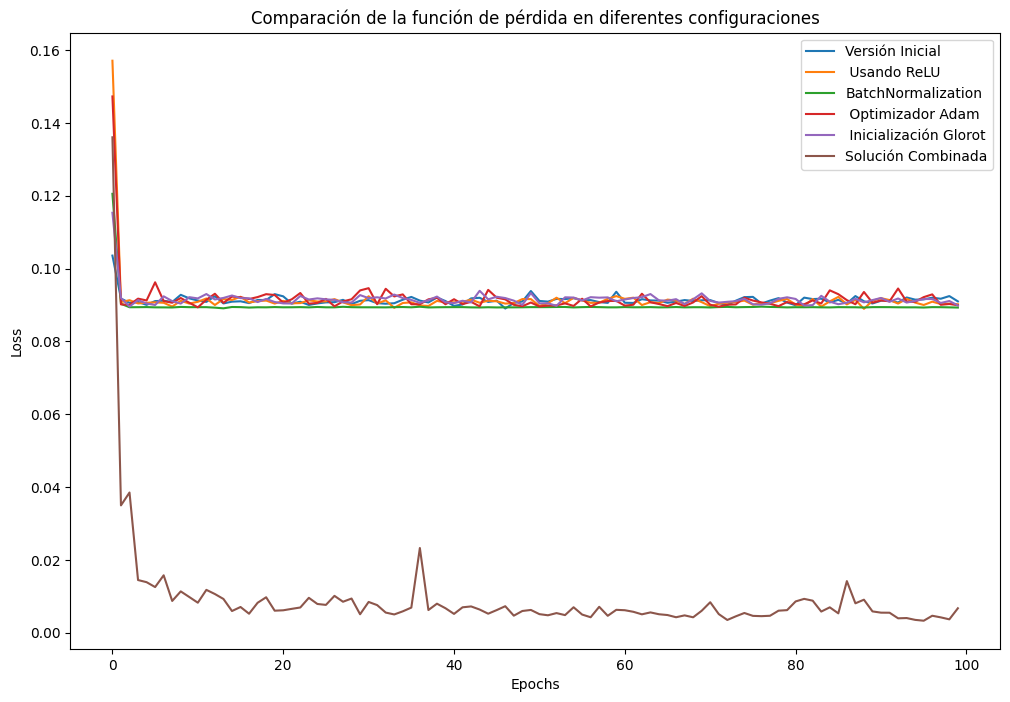

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(loss_function_VI, label='Versión Inicial')
plt.plot(loss_function_relu, label=' Usando ReLU')
plt.plot(loss_function_BatchNorm, label='BatchNormalization')
plt.plot(loss_function_Adam, label=' Optimizador Adam')
plt.plot(loss_function_glorot, label=' Inicialización Glorot')
plt.plot(loss_function_optima, label='Solución Combinada')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Comparación de la función de pérdida en diferentes configuraciones')
plt.show()


In [34]:
import pandas as pd

# Crear un DataFrame con datos de ejemplo
data = {
    "Loss": [loss_function_VI[-1], loss_function_relu[-1], loss_function_BatchNorm[-1], loss_function_Adam[-1], loss_function_glorot[-1], loss_function_optima[-1]],
    "Saturation Epoch": [saturation_epoch_VI, saturation_epoch_relu, saturation_epoch_BatchNorm, saturation_epoch_Adam, saturation_epoch_glorot, saturation_epoch_optima]
}

df = pd.DataFrame(data)
df.index = ['Versión Inicial', 'Usando ReLU', 'BatchNormalization', 'Optimizador Adam', 'Inicialización Glorot', 'Solución Combinada']
df.head(6)

,Loss,Saturation Epoch
Versión Inicial,0.090989,5
Usando ReLU,0.090200,21
BatchNormalization,0.089300,2
Optimizador Adam,0.089937,35
Inicialización Glorot,0.089869,15
Solución Combinada,0.006725,75


Obviamente, observando tanto la tabla como la gráfica de las funciones de pérdida de las diferentes configuraciones, se puede observar que la mejor solución es la que combina todos los métodos posibles que ayudan a evitar el desvanecimiento de gradiente. Se puede ver en la gráfica que las demás configuraciones se terminan estacando antes o después, pero esta, consigue completar el entrenamiento del modelo sin problemas.

# E2:

### Versión Inicial

In [54]:
np.random.seed(88) 
x = np.linspace(-1, 1, 1000)
y = x ** 2 + np.random.normal(0, 0.5, 1000)  # Relación no lineal con ruido

# Dividir los datos
x_train = x[:800].reshape(-1, 1)
y_train = y[:800].reshape(-1, 1)
x_val = x[800:].reshape(-1, 1)
y_val = y[800:].reshape(-1, 1)

# Crear un modelo sencillo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=500,
    batch_size=32,
    verbose=0
)


loss_function_VI = history.history['loss']
val_loss_function_VI = history.history['val_loss']

for i, _ in enumerate(val_loss_function_VI):
    if val_loss_function_VI[i + 1] - val_loss_function_VI[i] > 0.01:
        saturation_epoch_VI = i
        print(f"Inicio del sobreentrenamiento en la iteración {saturation_epoch_VI}")
        break



Inicio del sobreentrenamiento en la iteración 7


### 1º Solución: Regularización, usaremos el método de Dropout que nos permite desconectar aleaotoriamente un conjunto de conexiones neuronales durante el entrenamiento del modelo consiguiendo una mejor generalización al no depender demasiado de ciertas neuronas. Además, vamos a incluir un weight decay para todos los pesos de la red.

In [78]:
# Crear un modelo sencillo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer= optimizers.Adam(weight_decay=0.01), loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=500,
    batch_size=32,
    verbose=0
)


loss_function_regularization = history.history['loss']
val_loss_function_regularization = history.history['val_loss']

for i, _ in enumerate(val_loss_function_regularization):
    if val_loss_function_regularization[i + 1] - val_loss_function_regularization[i] > 0.01:
        saturation_epoch_regularization = i
        print(f"Inicio del sobreentrenamiento en la iteración {saturation_epoch_regularization}")
        break

c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Inicio del sobreentrenamiento en la iteración 7


### 2º Solución: Early Stopping

In [72]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
monitor = 'val_loss', 
patience = 5, 
restore_best_weights = True)

# Crear un modelo sencillo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer= 'adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=500,
    batch_size=32,
    callbacks = [early_stopping],
    verbose=0
)


loss_function_ES = history.history['loss']
val_loss_function_ES = history.history['val_loss']

saturation_epoch_ES = len(val_loss_function_ES)
print(f"Inicio del sobreentrenamiento en la iteración {saturation_epoch_ES}")
       

c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Inicio del sobreentrenamiento en la iteración 13


### 3º Solución: Aumento del número de datos de entrenamiento para que el modelo consiga aprender los patrones generales.

In [51]:
np.random.seed(88) 
x = np.linspace(-1, 1, 5000)
y = x ** 2 + np.random.normal(0, 0.5, 5000)  # Relación no lineal con ruido

# Dimoredatadir los datos
x_train = x[:4500].reshape(-1, 1)
y_train = y[:4500].reshape(-1, 1)
x_val = x[4500:].reshape(-1, 1)
y_val = y[4500:].reshape(-1, 1)

# Crear un modelo sencillo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=500,
    batch_size=32,
    verbose=0
)


loss_function_moredata = history.history['loss']
val_loss_function_moredata = history.history['val_loss']

for i, _ in enumerate(val_loss_function_moredata):
    if val_loss_function_moredata[i + 1] - val_loss_function_moredata[i] > 0.01:
        saturation_epoch_moredata = i
        print(f"Inicio del sobreentrenamiento en la iteración {saturation_epoch_moredata}")
        break

Inicio del sobreentrenamiento en la iteración 4


### Solución óptima combinada para evitar en gran medida el **Sobreentrenamiento**.

In [74]:

np.random.seed(88) 
early_stopping = EarlyStopping(
monitor = 'val_loss', 
patience = 5, 
restore_best_weights = True)

x = np.linspace(-1, 1, 5000)
y = x ** 2 + np.random.normal(0, 0.5, 5000)  # Relación no lineal con ruido

# DiSOdir los datos
x_train = x[:4500].reshape(-1, 1)
y_train = y[:4500].reshape(-1, 1)
x_val = x[4500:].reshape(-1, 1)
y_val = y[4500:].reshape(-1, 1)

# Crear un modelo sencillo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer= 'adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=500,
    batch_size=32,
    callbacks = [early_stopping],
    verbose=0
)


loss_function_SO = history.history['loss']
val_loss_function_SO = history.history['val_loss']

saturation_epoch_SO = len(val_loss_function_SO)
print(f"Inicio del sobreentrenamiento en la iteración {saturation_epoch_SO}")

c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Inicio del sobreentrenamiento en la iteración 16


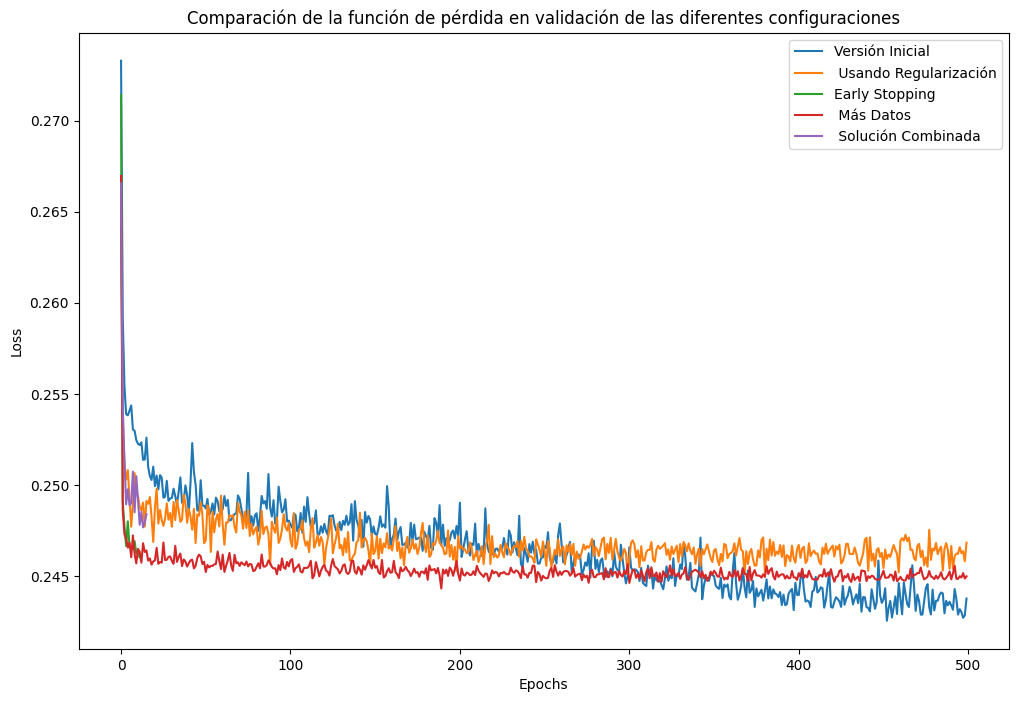

In [79]:
plt.figure(figsize=(12, 8))
plt.plot(loss_function_VI, label='Versión Inicial')
plt.plot(loss_function_regularization, label=' Usando Regularización')
plt.plot(loss_function_ES, label='Early Stopping')
plt.plot(loss_function_moredata, label=' Más Datos')
plt.plot(loss_function_SO, label=' Solución Combinada')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Comparación de la función de pérdida en validación de las diferentes configuraciones')
plt.show() 

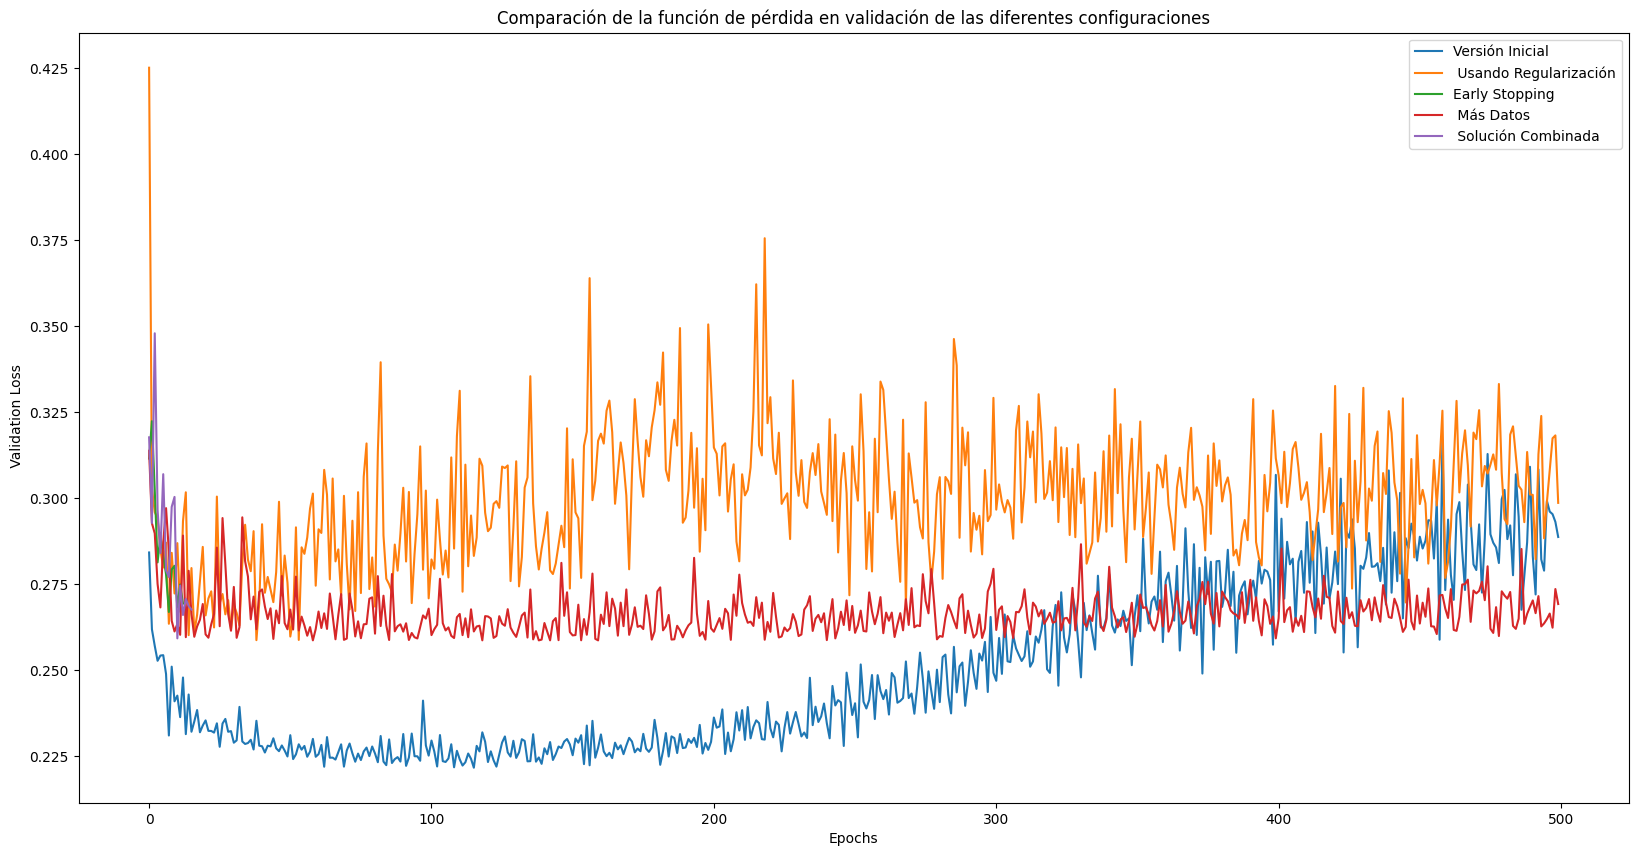

In [80]:
plt.figure(figsize=(20, 10))
plt.plot(val_loss_function_VI, label='Versión Inicial')
plt.plot(val_loss_function_regularization, label=' Usando Regularización')
plt.plot(val_loss_function_ES, label='Early Stopping')
plt.plot(val_loss_function_moredata, label=' Más Datos')
plt.plot(val_loss_function_SO, label=' Solución Combinada')
plt.xlabel('Epochs')
plt.ylabel(' Validation Loss')
plt.legend()
plt.title('Comparación de la función de pérdida en validación de las diferentes configuraciones')
plt.show() 

In [84]:
# Crear un DataFrame con datos de ejemplo
data = {
    "Loss": [loss_function_VI[-1], loss_function_regularization[-1], loss_function_ES[-1], loss_function_moredata[-1], loss_function_SO[-1]],
    "Val_Loss": [val_loss_function_VI[-1], val_loss_function_regularization[-1], val_loss_function_ES[-1], val_loss_function_moredata[-1], val_loss_function_SO[-1]],
    "Saturation Epoch": [saturation_epoch_VI, saturation_epoch_regularization, saturation_epoch_ES, saturation_epoch_moredata, saturation_epoch_SO]
}

df = pd.DataFrame(data)
df.index = ['Versión Inicial', 'Usando Regularización', 'Early Stopping', 'Más Datos', 'Solución Combinada']
df.head()

,Loss,Val_Loss,Saturation Epoch
Versión Inicial,0.243779,0.288672,7
Usando Regularización,0.246845,0.298590,7
Early Stopping,0.246047,0.269310,13
Más Datos,0.244999,0.269184,4
Solución Combinada,0.248401,0.267590,16


La mayoría de configuraciones tienen valores similares pero podemos observar tanto en la gráfica como en la tabla que la solución ofrecida con la combinación de los distintos métodos sería la mejor, también comentar que los métodos de Early Stopping y aumento de los datos de entrenamiento funciona bastante bien por si solos, consiguen reducir considerablemente el sobreentrenamiento que se produce.

# **P1.3**

**E1:** Partiendo del código proporcionado en el apartado previo referido al uso de redes preentrenadas como [extractores de características](#extractor), implemente el [ajuste fino de una red preentrenada](#fino), congelar las primeras 10 capas del modelo [MobileNetV3Small](https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV3Small) preentrenado con [ImageNet](https://image-net.org/download.php), y permitiendo el reentrenamiento del resto de capas.

1. Cambie el número de capas descongeladas en un rango razonable,y analice su influencia en tiempo y prestaciones. 
2. Repita los experimentos con un modelo un poco más complejo (``minimalistic=False``), y analice su influencia en tiempo y prestaciones.
3. Añada [aumentación de datos](https://www.tensorflow.org/tutorials/images/data_augmentation) en las capas inferiores del modelo, al menos volteado horizontal y rotación aleatoria, y analice su influencia en tiempo y prestaciones.

**E2:** Modifique nuevamente el código de partida con el modelo [MobileNetV3Small](https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV3Small) para evaluar el [entrenamiento desde cero de un modelo profundo](#cero).

1. Introduzca en los entrenamientos la [parada anticipada](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), para aliviar el tiempo de cómputo necesario.
2. Elabore una tabla que compare cada una de las 3 soluciones (extractor de características, ajuste fino y entrenamiento desde cero), recogiendo el número de parámetros, número de épocas necesarias para el entrenamiento, tiempo de entrenamiento y las prestaciones generales en test.

In [85]:
import os
from keras.preprocessing.image import load_img, img_to_array

# Descargar el conjunto de entrenamiento del dataset rock-paper-scissors

# Ruta base donde están las imágenes
base_dir = "../data/rps"

# Definir clases (nombres de carpetas)
class_names = ['rock', 'paper', 'scissors']

# Inicializar listas para imágenes y etiquetas
images = []
labels = []

# Cargar imágenes desde cada carpeta de clase
for label, class_name in enumerate(class_names):
    class_dir = os.path.join(base_dir, class_name)  # Ruta de la clase
    for img_file in os.listdir(class_dir):  # Iterar sobre las imágenes de la clase
        img_path = os.path.join(class_dir, img_file)
        img = load_img(img_path, target_size=(96, 96))   # Redimensionar imágenes
        img_array = img_to_array(img) / 127.5 - 1.0      # Normalizar a [-1, 1]
        
        images.append(img_array)
        labels.append(label)

# Convertir listas a NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Verificar dimensiones de datos cargados
print(f"Imágenes cargadas: {images.shape}, Etiquetas: {labels.shape}")

x_train, y_train = images, labels

Imágenes cargadas: (2520, 96, 96, 3), Etiquetas: (2520,)


In [86]:
# Descargar el conjunto de test del dataset rock-paper-scissors
# Ruta base donde están las imágenes
base_dir = "../data/rps-test-set"

# Definir clases (nombres de carpetas)
class_names = ['rock', 'paper', 'scissors']

# Inicializar listas para imágenes y etiquetas
images = []
labels = []

# Cargar imágenes desde cada carpeta de clase
for label, class_name in enumerate(class_names):
    class_dir = os.path.join(base_dir, class_name)  # Ruta de la clase
    for img_file in os.listdir(class_dir):  # Iterar sobre las imágenes de la clase
        img_path = os.path.join(class_dir, img_file)
        img = load_img(img_path, target_size=(96, 96))   # Redimensionar imágenes
        img_array = img_to_array(img) / 127.5 - 1.0      # Normalizar a [-1, 1]
        
        images.append(img_array)
        labels.append(label)

# Convertir listas a NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Verificar dimensiones de datos cargados
print(f"Imágenes cargadas: {images.shape}, Etiquetas: {labels.shape}")

x_test, y_test = images, labels

Imágenes cargadas: (372, 96, 96, 3), Etiquetas: (372,)


In [108]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

### **FEATURE EXTRACTION**

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 3, 3, 576)      │       441,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_15     │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_181 (Dense)               │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_182 (Dense)               │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515,243 (1.97 MB)

 Trainable params: 74,243 (290.01 KB)

 Non-trainable params: 441,000 (1.68 MB)

Epoch 1/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8031 - loss: 0.6130 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0023
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8741 - loss: 0.4829
Precisión en datos de validación: 0.82
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8741 - loss: 0.4829
Pérdida: 0.6915510296821594, Exactitud: 0.8225806355476379
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


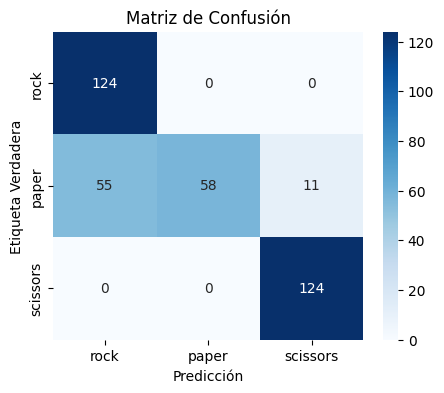

              precision    recall  f1-score   support

        rock       0.69      1.00      0.82       124
       paper       1.00      0.47      0.64       124
    scissors       0.92      1.00      0.96       124

    accuracy                           0.82       372
   macro avg       0.87      0.82      0.80       372
weighted avg       0.87      0.82      0.80       372



In [109]:
tf.keras.utils.set_random_seed(2025)  # experimentos reproducibles: fija semilla para python base, numpy and tf

# Cargar el modelo preentrenado sin la capa superior
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(96, 96, 3), include_preprocessing=False, minimalistic=True)

# Congelar las capas del modelo base, solo se entrenarán las capas superiores que añadamos
base_model.trainable = False

t0 = time.time()
# Añadir capas superiores personalizadas
model = keras.Sequential([
    base_model, # Modelo base preentrenado de MobileNetV3Small
    GlobalAveragePooling2D(),       # Capa de pooling global de media para reducir dimensiones
    Dense(128, activation='relu'),  # Capa Fully Connected de 128 neuronas
    Dense(3, activation='softmax')  # 3 clases: Rock, Paper, Scissors -> Capa de salida con activación Softmax para clasificación multiclase
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    # validation_data=(x_test, y_test),
    batch_size=32,
    epochs=5
)
t1 = time.time()

# Evaluar el modelo en el conjunto de validación
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en datos de validación: {accuracy:.2f}")

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida: {loss}, Exactitud: {accuracy}")

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predicciones
y_pred = np.argmax(model.predict(x_test), axis=-1)
q =model.predict(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Reporte de métricas
print(classification_report(y_test, y_pred, target_names=class_names))

In [112]:
parametros_entrenables_FE = np.sum([np.prod(p.shape) for p in model.trainable_variables])
epocas_FE = 5
tiempo_entrenamiento_FE = t1 - t0
prestaciones_test_FE = accuracy

# E1:

# **FINE TUNING**

c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\applications\mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 3, 3, 576)      │       441,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_16     │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_183 (Dense)               │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_184 (Dense)               │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515,243 (1.97 MB)

 Trainable params: 502,203 (1.92 MB)

 Non-trainable params: 13,040 (50.94 KB)

Epoch 1/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.9061 - loss: 0.2263 - val_accuracy: 0.9167 - val_loss: 0.2984
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 1.0000 - loss: 2.3900e-04 - val_accuracy: 0.9563 - val_loss: 0.2032
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 1.0000 - loss: 6.2279e-05 - val_accuracy: 0.9722 - val_loss: 0.1378
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 1.0000 - loss: 3.8221e-05 - val_accuracy: 0.9722 - val_loss: 0.1006
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 1.0000 - loss: 2.7488e-05 - val_accuracy: 0.9762 - val_loss: 0.0757
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8920 - loss: 0.6346
Precisión en datos de validación: 0.84
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8920 - loss: 0.6346
Pérdida: 0.8679890036582947, Exactitud: 0.8440860509872437
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


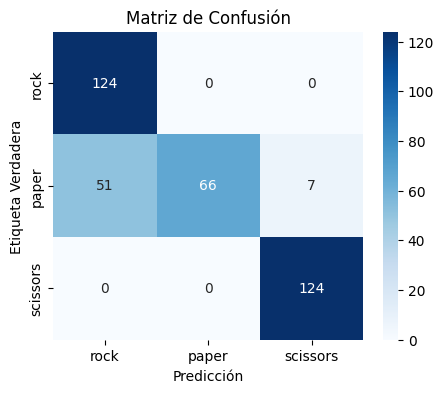

              precision    recall  f1-score   support

        rock       0.71      1.00      0.83       124
       paper       1.00      0.53      0.69       124
    scissors       0.95      1.00      0.97       124

    accuracy                           0.84       372
   macro avg       0.89      0.84      0.83       372
weighted avg       0.89      0.84      0.83       372



In [113]:
tf.keras.utils.set_random_seed(2025)  # Asegurar reproducibilidad

# Cargar el modelo base sin capa de salida y con pesos pre-entrenados
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(96, 96, 3),
                                 include_preprocessing=False, minimalistic=True)

# Congelar solo las primeras 10 capas
for layer in base_model.layers[:10]:
    layer.trainable = False


# Añadir capas superiores personalizadas
model = keras.Sequential([
    base_model, # Modelo base preentrenado de MobileNetV3Small
    GlobalAveragePooling2D(),       # Capa de pooling global de media para reducir dimensiones
    Dense(128, activation='relu'),  # Capa Fully Connected de 128 neuronas
    Dense(3, activation='softmax')  # 3 clases: Rock, Paper, Scissors -> Capa de salida con activación Softmax para clasificación multiclase
])

t0 = time.time()
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    # validation_data=(x_test, y_test),
    batch_size=32,
    epochs=5
)
t1 = time.time()

# Evaluar el modelo en el conjunto de validación
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en datos de validación: {accuracy:.2f}")

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida: {loss}, Exactitud: {accuracy}")

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predicciones
y_pred = np.argmax(model.predict(x_test), axis=-1)
q =model.predict(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Reporte de métricas
print(classification_report(y_test, y_pred, target_names=class_names))


In [114]:
parametros_entrenables_fineT_inicial = np.sum([np.prod(p.shape) for p in model.trainable_variables])
epocas_fineT_inicial = 5
tiempo_entrenamiento_fineT_inicial = t1 - t0
prestaciones_test_fineT_inicial = accuracy

#### 1. Cambie el número de capas descongeladas en un rango razonable,y analice su influencia en tiempo y prestaciones. 

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 3, 3, 576)      │       441,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515,243 (1.97 MB)

 Trainable params: 367,427 (1.40 MB)

 Non-trainable params: 147,816 (577.41 KB)

Epoch 1/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9453 - loss: 0.1970 - val_accuracy: 0.9960 - val_loss: 0.0159
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 1.0000 - loss: 2.1611e-05 - val_accuracy: 0.9960 - val_loss: 0.0175
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 1.0000 - loss: 1.2979e-05 - val_accuracy: 0.9921 - val_loss: 0.0187
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 7.6136e-06 - val_accuracy: 0.9960 - val_loss: 0.0168
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 1.0000 - loss: 4.4078e-06 - val_accuracy: 0.9960 - val_loss: 0.0167
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9815 - loss: 0.0423  
Precisión en datos de validación: 0.98
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9815 - loss: 0.0423   
Pérdida: 0.057028692215681076, Exactitud: 0.975806474685669
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


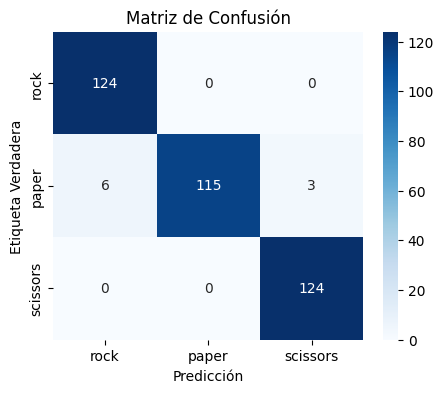

              precision    recall  f1-score   support

        rock       0.95      1.00      0.98       124
       paper       1.00      0.93      0.96       124
    scissors       0.98      1.00      0.99       124

    accuracy                           0.98       372
   macro avg       0.98      0.98      0.98       372
weighted avg       0.98      0.98      0.98       372



In [94]:
# Congelar las primeras 80 capas
for layer in base_model.layers[:80]:
    layer.trainable = False


# Añadir capas superiores personalizadas
model = keras.Sequential([
    base_model, # Modelo base preentrenado de MobileNetV3Small
    GlobalAveragePooling2D(),       # Capa de pooling global de media para reducir dimensiones
    Dense(128, activation='relu'),  # Capa Fully Connected de 128 neuronas
    Dense(3, activation='softmax')  # 3 clases: Rock, Paper, Scissors -> Capa de salida con activación Softmax para clasificación multiclase
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    # validation_data=(x_test, y_test),
    batch_size=32,
    epochs=5
)

# Evaluar el modelo en el conjunto de validación
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en datos de validación: {accuracy:.2f}")

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida: {loss}, Exactitud: {accuracy}")

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predicciones
y_pred = np.argmax(model.predict(x_test), axis=-1)
q =model.predict(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Reporte de métricas
print(classification_report(y_test, y_pred, target_names=class_names))


Se puede observar que cuanto más capas hayan descongeladas, más tiempo de ejecución y más cómputo necesitaremos para reentrenar los pesos del modelo base. En cuanto a prestaciones, parece que puede ser una buena aproximación descongelar las capas cercanas a la salida y reentrenar solamente con esas ya que las primeras capas captan información fundamental de siluetas, contornos y bordes generales.

2. Repita los experimentos con un modelo un poco más complejo (``minimalistic=False``), y analice su influencia en tiempo y prestaciones.

c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\applications\mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 3, 3, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,013,363 (3.87 MB)

 Trainable params: 1,000,475 (3.82 MB)

 Non-trainable params: 12,888 (50.34 KB)

Epoch 1/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.8915 - loss: 0.2328 - val_accuracy: 0.1310 - val_loss: 3.9363
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9940 - loss: 0.0091 - val_accuracy: 0.0754 - val_loss: 8.3792
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.4881 - val_loss: 2.3905
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9975 - loss: 0.0048 - val_accuracy: 0.0000e+00 - val_loss: 18.3744
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9990 - loss: 0.0014 - val_accuracy: 0.0833 - val_loss: 10.3014
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9467 - loss: 0.1545   
Precisión en datos de validación: 0.83
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9467 - loss: 0.1545   
Pérdida: 0.48101314902305603, Exactitud: 0.8252688050270081
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


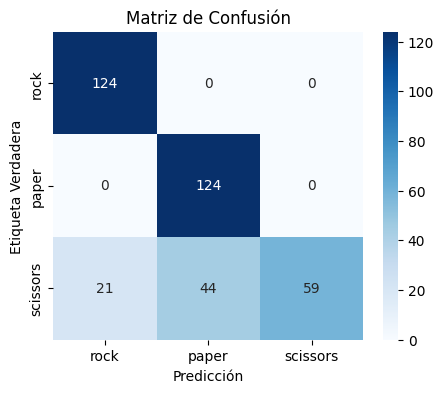

              precision    recall  f1-score   support

        rock       0.86      1.00      0.92       124
       paper       0.74      1.00      0.85       124
    scissors       1.00      0.48      0.64       124

    accuracy                           0.83       372
   macro avg       0.86      0.83      0.81       372
weighted avg       0.86      0.83      0.81       372



In [95]:
tf.keras.utils.set_random_seed(2025)  # Asegurar reproducibilidad

# Cargar el modelo base sin capa de salida y con pesos pre-entrenados
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(96, 96, 3),
                                 include_preprocessing=False, minimalistic=False)

# Congelar solo las primeras 10 capas
for layer in base_model.layers[:10]:
    layer.trainable = False


# Añadir capas superiores personalizadas
model = keras.Sequential([
    base_model, # Modelo base preentrenado de MobileNetV3Small
    GlobalAveragePooling2D(),       # Capa de pooling global de media para reducir dimensiones
    Dense(128, activation='relu'),  # Capa Fully Connected de 128 neuronas
    Dense(3, activation='softmax')  # 3 clases: Rock, Paper, Scissors -> Capa de salida con activación Softmax para clasificación multiclase
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    # validation_data=(x_test, y_test),
    batch_size=32,
    epochs=5
)

# Evaluar el modelo en el conjunto de validación
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en datos de validación: {accuracy:.2f}")

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida: {loss}, Exactitud: {accuracy}")

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predicciones
y_pred = np.argmax(model.predict(x_test), axis=-1)
q =model.predict(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Reporte de métricas
print(classification_report(y_test, y_pred, target_names=class_names))


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 3, 3, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,013,363 (3.87 MB)

 Trainable params: 857,699 (3.27 MB)

 Non-trainable params: 155,664 (608.06 KB)

Epoch 1/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9502 - loss: 0.1222 - val_accuracy: 0.4444 - val_loss: 8.3506
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 1.0000 - loss: 4.6749e-05 - val_accuracy: 0.4484 - val_loss: 9.0136
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 1.0000 - loss: 7.3662e-06 - val_accuracy: 0.5397 - val_loss: 6.8916
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 1.0000 - loss: 5.7798e-06 - val_accuracy: 0.5913 - val_loss: 5.4741
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 1.0000 - loss: 4.6222e-06 - val_accuracy: 0.6389 - val_loss: 4.5026
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9793 - loss: 0.0320   
Precisión en datos de validación: 0.97
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9793 - loss: 0.0320   
Pérdida: 0.05260077491402626, Exactitud: 0.9677419066429138
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


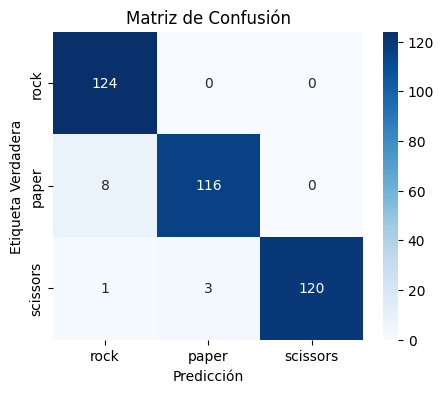

              precision    recall  f1-score   support

        rock       0.93      1.00      0.96       124
       paper       0.97      0.94      0.95       124
    scissors       1.00      0.97      0.98       124

    accuracy                           0.97       372
   macro avg       0.97      0.97      0.97       372
weighted avg       0.97      0.97      0.97       372



In [96]:
# Congelar las primeras 80 capas
for layer in base_model.layers[:80]:
    layer.trainable = False


# Añadir capas superiores personalizadas
model = keras.Sequential([
    base_model, # Modelo base preentrenado de MobileNetV3Small
    GlobalAveragePooling2D(),       # Capa de pooling global de media para reducir dimensiones
    Dense(128, activation='relu'),  # Capa Fully Connected de 128 neuronas
    Dense(3, activation='softmax')  # 3 clases: Rock, Paper, Scissors -> Capa de salida con activación Softmax para clasificación multiclase
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    # validation_data=(x_test, y_test),
    batch_size=32,
    epochs=5
)

# Evaluar el modelo en el conjunto de validación
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en datos de validación: {accuracy:.2f}")

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida: {loss}, Exactitud: {accuracy}")

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predicciones
y_pred = np.argmax(model.predict(x_test), axis=-1)
q =model.predict(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Reporte de métricas
print(classification_report(y_test, y_pred, target_names=class_names))

Llegamos a la misma conclusión anterior añadiendo que, como estamos tratando con un modelo más complejo que está conformado por un mayor número de parámetros, el entrenamiento de estos modelos conlleva un mayor gasto computacional y tiempo de ejecución que sus análogos de menos parámetros.

3. Añada [aumentación de datos](https://www.tensorflow.org/tutorials/images/data_augmentation) en las capas inferiores del modelo, al menos volteado horizontal y rotación aleatoria, y analice su influencia en tiempo y prestaciones

In [ ]:
# Aumentación de datos (volteo horizontal + rotación aleatoria)
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\applications\mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_57 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobileNetV3Small (Functional)   │ (None, 3, 3, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_13     │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_178 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 939,120 (3.58 MB)

 Trainable params: 926,232 (3.53 MB)

 Non-trainable params: 12,888 (50.34 KB)

Epoch 1/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.5607 - loss: 1.0120 - val_accuracy: 0.6865 - val_loss: 0.7229
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.9083 - loss: 0.3027 - val_accuracy: 0.7381 - val_loss: 0.6483
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9681 - loss: 0.1228 - val_accuracy: 0.7619 - val_loss: 0.6287
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.9783 - loss: 0.0710 - val_accuracy: 0.7857 - val_loss: 0.5895
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.9896 - loss: 0.0387 - val_accuracy: 0.8413 - val_loss: 0.3897
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8806 - loss: 0.4685
Pérdida en test: 0.5977, Exactitud: 0.8387
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


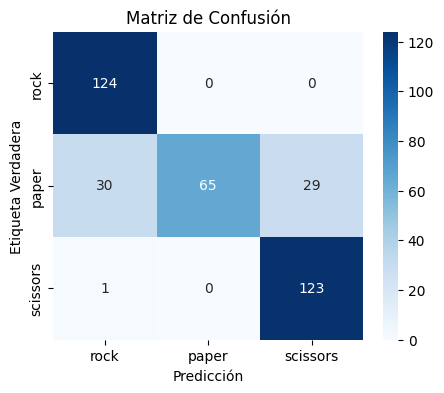

              precision    recall  f1-score   support

        rock       0.80      1.00      0.89       124
       paper       1.00      0.52      0.69       124
    scissors       0.81      0.99      0.89       124

    accuracy                           0.84       372
   macro avg       0.87      0.84      0.82       372
weighted avg       0.87      0.84      0.82       372



In [102]:
# Asegurar reproducibilidad
tf.keras.utils.set_random_seed(2025)

# Cargar el modelo base sin capa de salida y con pesos pre-entrenados
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(96, 96, 3),
                              include_preprocessing=False, minimalistic=False)

# Congelar solo las primeras 10 capas
for layer in base_model.layers[:10]:
    layer.trainable = False

# Aumentación de datos (volteo horizontal + rotación aleatoria)
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])    

# Añadir capas superiores personalizadas
model = keras.Sequential([
    data_augmentation,  # Aumentación de datos
    base_model, # Modelo base preentrenado de MobileNetV3Small
    GlobalAveragePooling2D(),       # Capa de pooling global de media para reducir dimensiones
    Dense(128, activation='relu'),  # Capa Fully Connected de 128 neuronas
    Dense(3, activation='softmax')  # 3 clases: Rock, Paper, Scissors -> Capa de salida con activación Softmax para clasificación multiclase
])


# Compilar el modelo con un optimizador de LR más bajo para ajuste fino(adaptativo)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Reducimos LR para ajuste fino
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


# Entrenar el modelo
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    # validation_data=(x_test, y_test),
    batch_size=32,
    epochs=5
)
# Evaluar el modelo en test
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida en test: {test_loss:.4f}, Exactitud: {test_accuracy:.4f}")

# Predicciones para análisis
predictions = np.argmax(model.predict(x_test), axis=-1)

# Matriz de confusión
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, predictions, target_names=class_names))


Parece que se obtiene un tiempo de ejecución y un rendimiento similar a los de los anteriores modelos. El objetivo de la aumentación de datos es conseguir que el modelo contenga una mayor capacidad de generalización haciendo que el modelo se vuelva más resistente a pequeñas modificaciones en los datos de entrada, como rotaciones, desplazamientos o cambios de iluminación.

# E2:

c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\applications\mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 3, 3, 576)      │       441,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_17     │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_185 (Dense)               │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_186 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_187 (Dense)               │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 482,283 (1.84 MB)

 Trainable params: 470,171 (1.79 MB)

 Non-trainable params: 12,112 (47.31 KB)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.8413 - loss: 0.4358 - val_accuracy: 0.9563 - val_loss: 0.2239
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 1.0000 - loss: 1.9906e-04 - val_accuracy: 0.9603 - val_loss: 0.2169
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 1.0000 - loss: 3.2465e-04 - val_accuracy: 0.9563 - val_loss: 0.2062
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 1.0000 - loss: 4.9277e-04 - val_accuracy: 0.9484 - val_loss: 0.3052
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 1.0000 - loss: 4.1054e-05 - val_accuracy: 0.9524 - val_loss: 0.2616
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 1.0000 - loss: 1.1034e-04 - val_accuracy: 0.9643 - val_loss: 0.1902
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 1.0000 - loss: 1.0026e-04 - val_accuracy: 0.9683 - val_loss: 0.1683
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 1.0000 - loss: 3.3312e-

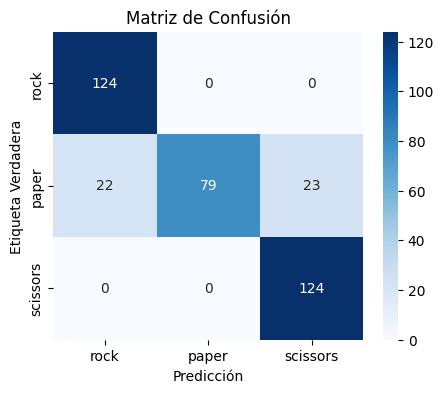

              precision    recall  f1-score   support

        rock       0.85      1.00      0.92       124
       paper       1.00      0.64      0.78       124
    scissors       0.84      1.00      0.92       124

    accuracy                           0.88       372
   macro avg       0.90      0.88      0.87       372
weighted avg       0.90      0.88      0.87       372



In [115]:
# Cargar el modelo preentrenado sin la capa superior
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(96, 96, 3), include_preprocessing=False, minimalistic=True)

# Añadir capas superiores personalizadas
model = keras.Sequential([
    base_model, # Modelo base preentrenado de MobileNetV3Small
    GlobalAveragePooling2D(), # Capa de pooling global de media para reducir dimensiones
    Dense(64, activation='relu'),  # Capa Fully Connected de 64 neuronas
    layers.Dropout(0.3),  # Dropout del 30% para regularización y evitar sobreajuste
    Dense(64, activation='relu'),  # Capa Fully Connected de 64 neuronas
    Dense(3, activation='softmax')  # 3 clases: Rock, Paper, Scissors -> Capa de salida con activación Softmax para clasificación multiclase
])

t0 = time.time()
# Compilar el modelo
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Callback para parada anticipada
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    # validation_data=(x_test, y_test),
    batch_size=64,
    callbacks=[early_stopping],
    epochs=10
)
t1 = time.time()

# Evaluar el modelo en el conjunto de validación
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en datos de validación: {accuracy:.2f}")

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida: {loss}, Exactitud: {accuracy}")


# Predicciones
y_pred = np.argmax(model.predict(x_test), axis=-1)
q =model.predict(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Reporte de métricas
print(classification_report(y_test, y_pred, target_names=class_names))

In [116]:
parametros_entrenables_from_scratch = np.sum([np.prod(p.shape) for p in model.trainable_variables])
epocas_from_scratch = 10
tiempo_entrenamiento_from_scratch = t1 - t0
prestaciones_test_from_scratch = accuracy

Parece que el modelo se esta sobreajustando ya que estamos utilizando un modelo muy complejo con un dataset pequeño.

# **Tabla de comparación**

In [117]:
data = { 
    "Parámetros Entrenables": [parametros_entrenables_FE, parametros_entrenables_fineT_inicial, parametros_entrenables_from_scratch],
    "Épocas": [epocas_FE, epocas_fineT_inicial, epocas_from_scratch],
    "Tiempo de Entrenamiento": [tiempo_entrenamiento_FE, tiempo_entrenamiento_fineT_inicial, tiempo_entrenamiento_from_scratch],
    "Prestaciones en Test": [prestaciones_test_FE, prestaciones_test_fineT_inicial, prestaciones_test_from_scratch]
}

df = pd.DataFrame(data)
df.index = ['Extracción de Características', 'Ajuste Fino Inicial', 'Ajuste desde Cero']
df.head()

,Parámetros Entrenables,Épocas,Tiempo de Entrenamiento,Prestaciones en Test
Extracción de Características,74243,5,7.626877,0.822581
Ajuste Fino Inicial,502203,5,22.356817,0.844086
Ajuste desde Cero,470171,10,38.357630,0.879032
